## Random Forest and XGBoost

Random Forest and XGBoost improve upon basic Decision Trees by creating ensembles of trees, which work by averaging multiple decision trees to reduce variance (Random Forest) or sequentially improving upon previous trees to reduce bias (XGBoost), thus enhancing overall prediction accuracy.

In [3]:
# create a random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=3)

import pandas as pd
from scipy.io import arff
elevators, _ = arff.loadarff("data/dataset_2202_elevators.arff")
elev = pd.DataFrame(elevators)
X_elev = elev.drop(columns=['Goal'])
y_elev = elev['Goal']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_elev, y_elev, random_state=42)

rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.5270150841957546

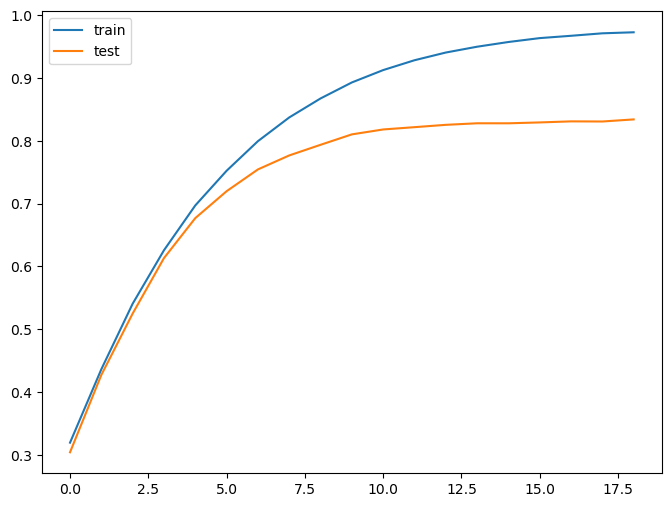

In [4]:
# sweep over depths and plot results
test_scores = []
train_scores = []
for i in range(1, 20):
  rf = RandomForestRegressor(n_estimators=100, max_depth=i)
  rf.fit(X_train, y_train)
  test_scores.append(rf.score(X_test, y_test))
  train_scores.append(rf.score(X_train, y_train))

ax = pd.DataFrame({'train': train_scores, 'test': test_scores}).plot.line(figsize=(8, 6))

In [6]:
# create a random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=13, random_state=42)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8266281725960586

In [7]:
# create a xgb regressor
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

0.8764783616363858

In [9]:
import pandas as pd
raw = pd.read_csv('data/titanic.csv')
data = raw.loc[:, ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].dropna()

from sklearn.tree import DecisionTreeClassifier
data_X = data.loc[:, ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
data_y = data.loc[:, ['Survived']]

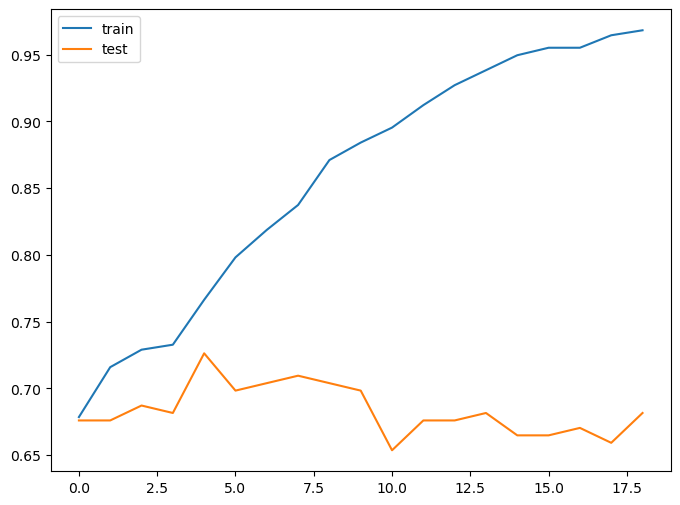

In [10]:
# split data
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, random_state=42)
# sweep over depths and plot results
test_scores = []
train_scores = []
for i in range(1, 20):
  dt = DecisionTreeClassifier(max_depth=i)
  dt.fit(X_train, y_train)
  test_scores.append(dt.score(X_test, y_test))
  train_scores.append(dt.score(X_train, y_train))

ax = pd.DataFrame({'train': train_scores, 'test': test_scores}).plot.line(figsize=(8, 6))